In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.signal import butter, filtfilt
# 1. 读取 CSV 文件
root_path = 'joint_output'
#no_exo_dir = os.path.join(root_path,'run/run_human/joint_states_log.csv')
#exo_dir = os.path.join(root_path,'run/run_exo/joint_states_log_max.csv')

no_exo_dir = os.path.join(root_path,'walk/no_exo_no_vel_addclip/joint_states_log.csv')
exo_dir = os.path.join(root_path,'walk/with_exo_no_vel_addclip/joint_states_log.csv')

fs = 100  # 100 Hz 示例
# 截止频率（Hz），一般动作数据 5~10Hz 就够
cutoff = 6  

# 创建 Butterworth 低通滤波器
def lowpass_filter(data, cutoff=6, fs=100, order=4):
    nyq = 0.5 * fs          # 奈奎斯特频率
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)  # 双向滤波，避免相位偏移
    return filtered_data


In [4]:
df_noexo = pd.read_csv(no_exo_dir)
df_exo = pd.read_csv(exo_dir)
# 2. 打印前几行，看看数据结构
print(df_exo.head())
print(len(df_exo))
length = 200


   Activation   COM_X_P   COM_X_V   L_Hip_pos  L_Hip_vel  R_Hip_pos  \
0    0.053890  -2.34634    1.11231  -0.007033   1.954070  -0.397671   
1    0.080505  -2.30917    1.13887  -0.068516  -2.175400  -0.577203   
2    0.145973  -2.27041    1.17615  -0.063195   0.667915  -0.713810   
3    0.139620  -2.23119    1.18086   0.046402   3.363220  -0.734302   
4    0.106039  -2.19083    1.23615   0.105818   1.396340  -0.750545   

   R_Hip_vel    L_Knee_pos    L_Knee_vel  R_Knee_pos  R_Knee_vel  L_Hip_tau  \
0  -1.505780  2.307950e-02 -1.084750e+00    0.959442    0.022135   8.687420   
1  -4.828300 -4.900890e-12  1.949770e-09    0.969866    0.123323 -14.354700   
2  -4.064680 -5.214010e-12 -6.568080e-13    0.974359   -0.538398  -7.411480   
3  -0.092755 -6.485620e-12  1.062530e-11    0.941675   -1.126390   6.391990   
4  -0.399233 -6.455480e-12 -9.476860e-13    0.858040   -2.239410   0.170732   

   R_Hip_tau  L_Knee_tau  R_Knee_tau  HumanL_Hip_tau  HumanR_Hip_tau  \
0    -4.6640           0  

In [5]:


# 3. 画曲线（假设有 'x' 和 'y' 两列

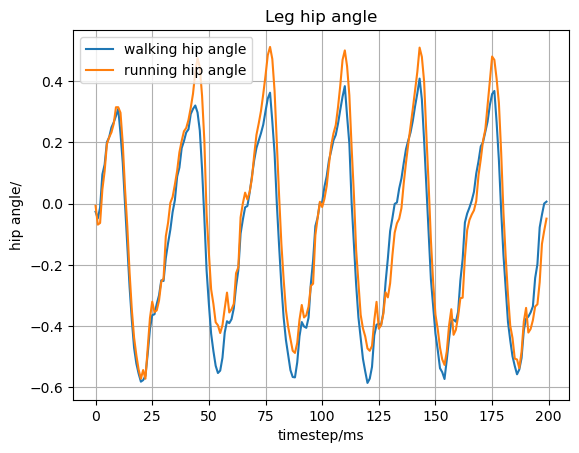

In [6]:

timestep =  np.arange(length) #100hz

plt.plot(timestep,  df_noexo['L_Hip_pos'][0:length], linestyle='-', label='walking hip angle')
plt.plot(timestep,  df_exo['L_Hip_pos'][0:length], linestyle='-', label='running hip angle')

# 4. 美化图表
plt.xlabel('timestep/ms')
plt.ylabel('hip angle/')
plt.title('Leg hip angle')
plt.legend()
plt.grid(True)
plt.show()

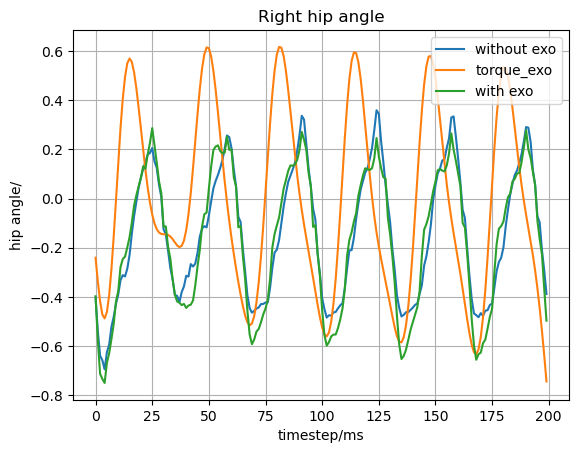

In [12]:

timestep =  np.arange(length) #100hz

plt.plot(timestep,  df_noexo['R_Hip_pos'][0:length], linestyle='-', label='without exo')

plt.plot(timestep,  df_exo['R_Hip_pos'][0:length], linestyle='-', label='with exo')

# 4. 美化图表
plt.xlabel('timestep/ms')
plt.ylabel('hip angle/')
plt.title('Right hip angle')
plt.legend()
plt.grid(True)
plt.show()

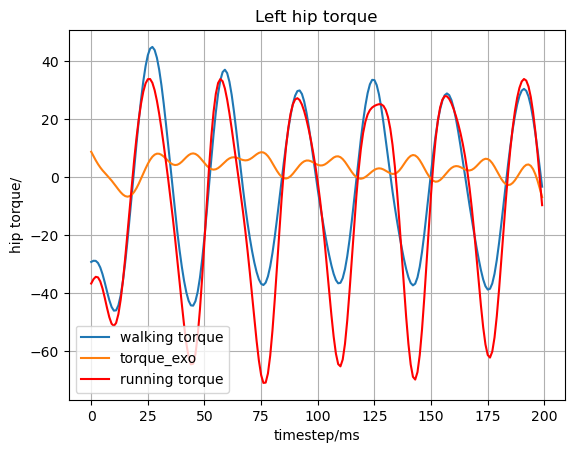

In [8]:

timestep =  np.arange(length) #100hz
torque_no_exo = lowpass_filter(df_noexo['L_Hip_tau'][0:length])

torque_exo = lowpass_filter(df_exo['L_Exo_tau'][0:length])
torque_human = lowpass_filter(df_exo['HumanL_Hip_tau'][0:length])
plt.plot(timestep, torque_no_exo, linestyle='-', label='walking torque')
plt.plot(timestep,  torque_exo, linestyle='-', label='torque_exo')
plt.plot(timestep,  torque_human, linestyle='-',c='r', label='running torque')
# plt.plot(timestep,  df_exo['L_Hip_vel'][0:length], linestyle='-', label='hip angle')
# # 4. 美化图表
plt.xlabel('timestep/ms')
plt.ylabel('hip torque/')
plt.title('Left hip torque')
plt.legend()
plt.grid(True)
plt.show()

# 力矩分析



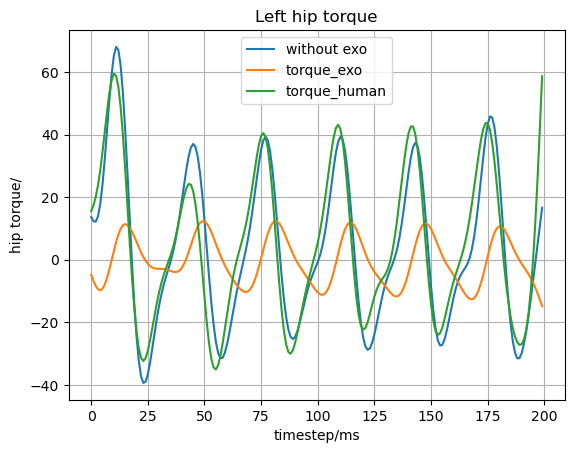

In [9]:

timestep =  np.arange(length) #100hz
torque_no_exo = lowpass_filter(df_noexo['R_Hip_tau'][0:length])

torque_exo = lowpass_filter(df_exo['R_Exo_tau'][0:length])
torque_human = lowpass_filter(df_exo['HumanR_Hip_tau'][0:length])
plt.plot(timestep, torque_no_exo, linestyle='-', label='without exo')
plt.plot(timestep,  torque_exo, linestyle='-', label='torque_exo')
plt.plot(timestep,  torque_human, linestyle='-', label='torque_human')
# 4. 美化图表
plt.xlabel('timestep/ms')
plt.ylabel('hip torque/')
plt.title('Left hip torque')
plt.legend()
plt.grid(True)
plt.show()

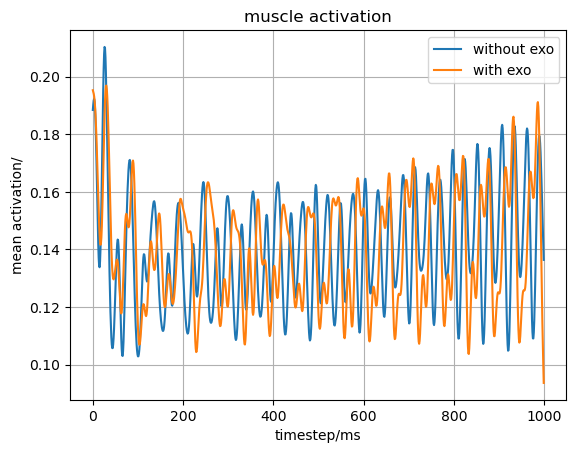

In [78]:

timestep =  np.arange(length) #100hz
activation_without_exo = lowpass_filter(df_noexo['Activation'][0:length])

activation_with_exo = lowpass_filter(df_exo['Activation'][0:length])

plt.plot(timestep,activation_without_exo, linestyle='-', label='without exo')
plt.plot(timestep,activation_with_exo, linestyle='-', label='with exo')

# 4. 美化图表
plt.xlabel('timestep/ms')
plt.ylabel('mean activation/')
plt.title('muscle activation')
plt.legend()
plt.grid(True)
plt.show()

In [79]:


# 假设你已经有两个 numpy 数组
# torque_no_exo = np.loadtxt("hip_no_exo.csv", delimiter=",")
# torque_with_exo = np.loadtxt("hip_with_exo.csv", delimiter=",")

# 计算峰值力矩

peak_no_exo = np.max(np.abs(torque_no_exo))
peak_with_exo = np.max(np.abs(torque_human))

# 计算均方根力矩 RMS
rms_no_exo = np.sqrt(np.mean(torque_no_exo**2))
rms_with_exo = np.sqrt(np.mean(torque_human**2))

act_no_exo = np.sqrt(np.mean(activation_without_exo**2))
act_with_exo = np.sqrt(np.mean(activation_with_exo**2))

# 打印结果
print("Peak Torque:")
print(f"Without exo: {peak_no_exo:.3f} Nm")
print(f"With exo: {peak_with_exo:.3f} Nm")
print("===================")
print("RMS Torque:")
print(f"Without exo: {rms_no_exo:.3f} Nm")
print(f"With exo: {rms_with_exo:.3f} Nm")
print("===================")
print("Muscle Activation:")
print(f"Without exo: {act_no_exo:.3f} ")
print(f"With exo: {act_with_exo:.3f} ")
print("===================")
peak_reduction = (peak_no_exo - peak_with_exo) / peak_no_exo * 100
rms_reduction = (rms_no_exo - rms_with_exo) / rms_no_exo * 100
act_reduction =  (act_no_exo - act_with_exo) / act_no_exo * 100
print("Reduction in torque:")
print(f"peak torque: {peak_reduction:.2f}%")
print(f"rms torque: {rms_reduction:.2f}%")
print("===================")
print("Reduction in Activation:")
print(f"peak torque: {act_reduction:.2f}%")


Peak Torque:
Without exo: 197.454 Nm
With exo: 196.105 Nm
RMS Torque:
Without exo: 84.189 Nm
With exo: 74.085 Nm
Muscle Activation:
Without exo: 0.142 
With exo: 0.141 
Reduction in torque:
peak torque: 0.68%
rms torque: 12.00%
Reduction in Activation:
peak torque: 0.46%
